In [2]:
import requests
import pandas as pd

In [3]:
# create request header
headers = {'User-Agent': "youremail@address.com"}

# get all companies data
companyTickers = requests.get(
    "https://www.sec.gov/files/company_tickers.json",
    headers=headers
    )

In [4]:
# Retrieiving the list of companies in edgar along with their Central Index Key (CIK)
company_data = pd.DataFrame(companyTickers.json()).T
company_data["cik_str"] = company_data.cik_str.astype(str).str.zfill(10)
company_data

,cik_str,ticker,title
0,0000320193,AAPL,Apple Inc.
1,0000789019,MSFT,MICROSOFT CORP
2,0001652044,GOOGL,Alphabet Inc.
3,0001018724,AMZN,AMAZON COM INC
4,0001045810,NVDA,NVIDIA CORP
...,...,...,...
8928,0001411494,AAM-PA,"Apollo Asset Management, Inc."
8929,0001819848,JOBY-WT,"Joby Aviation, Inc."
8930,0001413159,TGH-PB,TEXTAINER GROUP HOLDINGS LTD
8931,0001630805,BWSN,"Babcock & Wilcox Enterprises, Inc."


In [5]:
# Analyzing a single company data: AAPL
company_name = company_data.iloc[0].title
company_cik = company_data.iloc[0].cik_str

company_filing_meta = requests.get(
    f'https://data.sec.gov/submissions/CIK{company_cik}.json',
    headers=headers
    )

print("Metadata for %s -------------" %(company_name))
print(company_filing_meta.json().keys())

Metadata for Apple Inc. -------------
dict_keys(['cik', 'entityType', 'sic', 'sicDescription', 'insiderTransactionForOwnerExists', 'insiderTransactionForIssuerExists', 'name', 'tickers', 'exchanges', 'ein', 'description', 'website', 'investorWebsite', 'category', 'fiscalYearEnd', 'stateOfIncorporation', 'stateOfIncorporationDescription', 'addresses', 'phone', 'flags', 'formerNames', 'filings'])


In [6]:
metadata = company_filing_meta.json()

In [7]:
metadata

{'cik': '320193',
 'entityType': 'operating',
 'sic': '3571',
 'sicDescription': 'Electronic Computers',
 'insiderTransactionForOwnerExists': 0,
 'insiderTransactionForIssuerExists': 1,
 'name': 'Apple Inc.',
 'tickers': ['AAPL'],
 'exchanges': ['Nasdaq'],
 'ein': '942404110',
 'description': '',
 'website': '',
 'investorWebsite': '',
 'category': 'Large accelerated filer',
 'fiscalYearEnd': '0930',
 'stateOfIncorporation': 'CA',
 'stateOfIncorporationDescription': 'CA',
 'addresses': {'mailing': {'street1': 'ONE APPLE PARK WAY',
   'street2': None,
   'city': 'CUPERTINO',
   'stateOrCountry': 'CA',
   'zipCode': '95014',
   'stateOrCountryDescription': 'CA'},
  'business': {'street1': 'ONE APPLE PARK WAY',
   'street2': None,
   'city': 'CUPERTINO',
   'stateOrCountry': 'CA',
   'zipCode': '95014',
   'stateOrCountryDescription': 'CA'}},
 'phone': '(408) 996-1010',
 'flags': '',
 'formerNames': [{'name': 'APPLE INC',
   'from': '2007-01-10T00:00:00.000Z',
   'to': '2019-08-05T00:00:0

In [8]:
metadata['filings'].keys()

dict_keys(['recent', 'files'])

In [9]:
metadata['filings']['recent'].keys()

dict_keys(['accessionNumber', 'filingDate', 'reportDate', 'acceptanceDateTime', 'act', 'form', 'fileNumber', 'filmNumber', 'items', 'size', 'isXBRL', 'isInlineXBRL', 'primaryDocument', 'primaryDocDescription'])

In [10]:
metadata['filings']['recent']

{'accessionNumber': ['0000320193-23-000079',
  '0001973141-23-000171',
  '0000320193-23-000077',
  '0000320193-23-000075',
  '0000320193-23-000070',
  '0000320193-23-000068',
  '0000320193-23-000066',
  '0001140361-23-023909',
  '0001140361-23-023700',
  '0001140361-23-023544',
  '0001140361-23-023333',
  '0000320193-23-000064',
  '0000320193-23-000063',
  '0000320193-23-000057',
  '0000320193-23-000055',
  '0001958244-23-000454',
  '0000320193-23-000053',
  '0001958244-23-000440',
  '0000320193-23-000051',
  '0000320193-23-000050',
  '0000320193-23-000049',
  '0000320193-23-000048',
  '0000320193-23-000047',
  '0000320193-23-000040',
  '0001140361-23-012065',
  '0000320193-23-000038',
  '0000320193-23-000037',
  '0000320193-23-000036',
  '0000320193-23-000035',
  '0000320193-23-000034',
  '0000320193-23-000033',
  '0000320193-23-000032',
  '0000320193-23-000031',
  '0001140361-23-011192',
  '0001096906-23-000438',
  '0001096906-23-000437',
  '0001214659-23-002862',
  '0001096906-23-00

In [11]:
# dictionary to dataframe
allForms = pd.DataFrame.from_dict(
             metadata['filings']['recent']
             )

# review columns
allForms.columns
print(allForms[['accessionNumber', 'reportDate', 'form']].head())

        accessionNumber  reportDate  form
0  0000320193-23-000079  2023-08-05     4
1  0001973141-23-000171               144
2  0000320193-23-000077  2023-07-01  10-Q
3  0000320193-23-000075  2023-08-03   8-K
4  0000320193-23-000070  2023-05-16     4


In [12]:
# 10-Q metadata
allForms.iloc[2]

accessionNumber              0000320193-23-000077
filingDate                             2023-08-04
reportDate                             2023-07-01
acceptanceDateTime       2023-08-03T18:04:43.000Z
act                                            34
form                                         10-Q
fileNumber                              001-36743
filmNumber                              231141522
items                                            
size                                      5939898
isXBRL                                          1
isInlineXBRL                                    1
primaryDocument                 aapl-20230701.htm
primaryDocDescription                        10-Q
Name: 2, dtype: object

### Information available

1. Business Type
2. State of Incorporation
3. Exchanges
4. SIC with Decription

What more information is available? 

XBRL data, Extensible Business Markup Language (XBRL) is an XML-based format for reporting financial statements used by the SEC and financial regulatory agencies across the world. -  source "https://www.sec.gov/edgar/sec-api-documentation"

In [20]:
company_facts = requests.get(
    f'https://data.sec.gov/api/xbrl/companyfacts/CIK{company_cik}.json',
    headers=headers
    )

print(company_facts.json().keys())

dict_keys(['cik', 'entityName', 'facts'])


In [21]:
company_facts_dict = company_facts.json()

In [22]:
print(company_facts_dict['facts'].keys())

dict_keys(['dei', 'us-gaap'])


In [23]:
company_facts_dict['facts']['dei'][
    'EntityCommonStockSharesOutstanding']
company_facts_dict['facts']['dei'][
    'EntityCommonStockSharesOutstanding'].keys()
company_facts_dict['facts']['dei'][
    'EntityCommonStockSharesOutstanding']['units']
company_facts_dict['facts']['dei'][
    'EntityCommonStockSharesOutstanding']['units']['shares']
company_facts_dict['facts']['dei'][
    'EntityCommonStockSharesOutstanding']['units']['shares'][0]

{'end': '2009-06-27',
 'val': 895816758,
 'accn': '0001193125-09-153165',
 'fy': 2009,
 'fp': 'Q3',
 'form': '10-Q',
 'filed': '2009-07-22',
 'frame': 'CY2009Q2I'}

In [24]:
company_facts_dict['facts']['us-gaap']
company_facts_dict['facts']['us-gaap'].keys()

# different amounts of data available per concept
company_facts_dict['facts']['us-gaap']['AccountsPayable']
company_facts_dict['facts']['us-gaap']['Revenues']
company_facts_dict['facts']['us-gaap']['Assets']

{'label': 'Assets',
 'description': 'Sum of the carrying amounts as of the balance sheet date of all assets that are recognized. Assets are probable future economic benefits obtained or controlled by an entity as a result of past transactions or events.',
 'units': {'USD': [{'end': '2008-09-27',
    'val': 39572000000,
    'accn': '0001193125-09-153165',
    'fy': 2009,
    'fp': 'Q3',
    'form': '10-Q',
    'filed': '2009-07-22'},
   {'end': '2008-09-27',
    'val': 39572000000,
    'accn': '0001193125-09-214859',
    'fy': 2009,
    'fp': 'FY',
    'form': '10-K',
    'filed': '2009-10-27'},
   {'end': '2008-09-27',
    'val': 36171000000,
    'accn': '0001193125-10-012091',
    'fy': 2009,
    'fp': 'FY',
    'form': '10-K/A',
    'filed': '2010-01-25'},
   {'end': '2008-09-27',
    'val': 36171000000,
    'accn': '0001193125-10-238044',
    'fy': 2010,
    'fp': 'FY',
    'form': '10-K',
    'filed': '2010-10-27',
    'frame': 'CY2008Q3I'},
   {'end': '2009-06-27',
    'val': 4814

In [25]:
company_facts_dict['facts']['us-gaap']['Revenues']

{'label': 'Revenues',
 'description': 'Amount of revenue recognized from goods sold, services rendered, insurance premiums, or other activities that constitute an earning process. Includes, but is not limited to, investment and interest income before deduction of interest expense when recognized as a component of revenue, and sales and trading gain (loss).',
 'units': {'USD': [{'start': '2015-09-27',
    'end': '2016-09-24',
    'val': 215639000000,
    'accn': '0000320193-18-000145',
    'fy': 2018,
    'fp': 'FY',
    'form': '10-K',
    'filed': '2018-11-05',
    'frame': 'CY2016'},
   {'start': '2016-09-25',
    'end': '2016-12-31',
    'val': 78351000000,
    'accn': '0000320193-18-000145',
    'fy': 2018,
    'fp': 'FY',
    'form': '10-K',
    'filed': '2018-11-05',
    'frame': 'CY2016Q4'},
   {'start': '2017-01-01',
    'end': '2017-04-01',
    'val': 52896000000,
    'accn': '0000320193-18-000145',
    'fy': 2018,
    'fp': 'FY',
    'form': '10-K',
    'filed': '2018-11-05',

In [26]:
company_revenue = pd.DataFrame.from_dict(company_facts_dict['facts']['us-gaap']['Revenues']['units']["USD"])
company_revenue.head()

,start,end,val,accn,fy,fp,form,filed,frame
0,2015-09-27,2016-09-24,215639000000,0000320193-18-000145,2018,FY,10-K,2018-11-05,CY2016
1,2016-09-25,2016-12-31,78351000000,0000320193-18-000145,2018,FY,10-K,2018-11-05,CY2016Q4
2,2017-01-01,2017-04-01,52896000000,0000320193-18-000145,2018,FY,10-K,2018-11-05,CY2017Q1
3,2017-04-02,2017-07-01,45408000000,0000320193-18-000145,2018,FY,10-K,2018-11-05,CY2017Q2
4,2016-09-25,2017-09-30,229234000000,0000320193-18-000145,2018,FY,10-K,2018-11-05,CY2017


In [27]:
company_revenue.start.unique()

array(['2015-09-27', '2016-09-25', '2017-01-01', '2017-04-02',
       '2017-07-02', '2017-10-01', '2017-12-31', '2018-04-01',
       '2018-07-01'], dtype=object)

<AxesSubplot:title={'center':'Company Revenue'}, xlabel='end'>

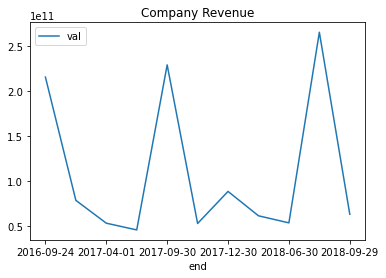

In [28]:
company_revenue.plot(x='end', y='val', title = "Company Revenue")

In [31]:
# get company concept data
company_concept = requests.get(
    (
    f'https://data.sec.gov/api/xbrl/companyconcept/CIK{company_cik}'
     f'/us-gaap/Assets.json'
    ),
    headers=headers
    )

print(company_concept.json().keys())

dict_keys(['cik', 'taxonomy', 'tag', 'label', 'description', 'entityName', 'units'])


In [32]:
# Incremental inspection of dictionary values
company_concept_dict = company_concept.json()

company_concept_dict.keys()
company_concept_dict['units']
company_concept_dict['units'].keys()
company_concept_dict['units']['USD']
company_concept_dict['units']['USD'][-1]

{'end': '2023-07-01',
 'val': 335038000000,
 'accn': '0000320193-23-000077',
 'fy': 2023,
 'fp': 'Q3',
 'form': '10-Q',
 'filed': '2023-08-04',
 'frame': 'CY2023Q2I'}

In [33]:
# Assets from single filing as of date mentioned
company_concept_dict['units']['USD'][-1]['val']

335038000000

In [34]:
# Assets data from AAPL
assets_data = pd.DataFrame.from_dict((company_concept_dict['units']['USD']))
assets_data.tail()

,end,val,accn,fy,fp,form,filed,frame
117,2022-09-24,352755000000,0000320193-23-000064,2023,Q2,10-Q,2023-05-05,NaN
118,2022-09-24,352755000000,0000320193-23-000077,2023,Q3,10-Q,2023-08-04,CY2022Q3I
119,2022-12-31,346747000000,0000320193-23-000006,2023,Q1,10-Q,2023-02-03,CY2022Q4I
120,2023-04-01,332160000000,0000320193-23-000064,2023,Q2,10-Q,2023-05-05,CY2023Q1I
121,2023-07-01,335038000000,0000320193-23-000077,2023,Q3,10-Q,2023-08-04,CY2023Q2I


The Form 10-Q includes unaudited financial statements and provides a continuing view of the company's financial position during the year. The report must be filed for each of the first three fiscal quarters of the company's fiscal year.

<AxesSubplot:title={'center':'Assets 10Q'}, xlabel='end'>

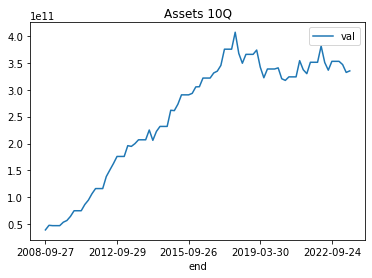

In [36]:
# get assests from 10Q form

assets_10Q = assets_data[assets_data.form == '10-Q']
assets_10Q = assets_10Q.reset_index(drop=True)
assets_10Q.plot(x='end', y='val', title = "Assets 10Q")

In [37]:
assets_10Q.head()

,end,val,accn,fy,fp,form,filed,frame
0,2008-09-27,39572000000,0001193125-09-153165,2009,Q3,10-Q,2009-07-22,NaN
1,2009-06-27,48140000000,0001193125-09-153165,2009,Q3,10-Q,2009-07-22,CY2009Q2I
2,2009-09-26,47501000000,0001193125-10-012085,2010,Q1,10-Q,2010-01-25,NaN
3,2009-09-26,47501000000,0001193125-10-088957,2010,Q2,10-Q,2010-04-21,NaN
4,2009-09-26,47501000000,0001193125-10-162840,2010,Q3,10-Q,2010-07-21,NaN
